In [2]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd
%autosave 0 

Autosave disabled


In [4]:


from utils_hmm import *



In [3]:
def Markov_A_2_grafo(A,ccxyth):
    dists=np.zeros(A.shape)
    for i in range(A.shape[0]):
        for j in range (A.shape[1]):
            if A[i,j]!=0 :
                dists[i,j]= np.linalg.norm(ccxyth[i]-ccxyth[j])    
    
    
    con = np.where(dists==0,np.inf,dists)
    graphe2=grafo(ccxyth,con)
    return graphe2


class node(object):
    def __init__(self,x,y):
        self.x=x
        self.y=y
        
        
class grafo (object):
             def __init__(self,nodos,conec):
                 self.nodos=nodos
                 self.conec=conec        

def dijkstra(nodoinicial,nodofinal,graphe):
    

    numnodos= len(graphe.nodos)
    con = graphe.conec
    D= np.ones(numnodos)*np.inf
    Prv= np.ones(numnodos)*np.inf
    V= np.zeros(numnodos)
    a = nodoinicial
    D[a]=0
    Prv[a]=0
    Prv[np.where(con[a]!=np.inf)]=a
    V[a]=1
    Dacc=D[a]
    ########
    D=np.minimum(D,con[a]+D[a])
    cont=0
    sucess=False
    while(sucess==False):
        a = np.argmin(D+np.where (V==1,np.inf, V))
        Dacc=D[a]
        Prv[np.where(D>(con[a]+Dacc) )]=a
        V[a]=1
        D=np.minimum(D,con[a]+Dacc)
        if (a== nodofinal):
            print("RUTA CALCULADA ")
            sucess=True
    rutainv=[]
    rutainv.append(nodofinal)
    while(rutainv[-1]!=nodoinicial):
        prv=Prv[int(rutainv[-1])]
        rutainv.append(prv)

    ruta=[]
    for n in reversed(rutainv):
        ruta.append(n)
    return(ruta)


In [6]:
fast_load=True


if fast_load:
    #datamugroso=pd.read_csv('dataset_candidatura_wr/fast_load.csv')
    datamugroso=pd.read_csv('pddata.csv')
    data= datamugroso.iloc[:,1:].sample(n=10000,axis=0)
    #lecs=data[data.Vk==lec_leida].sample(n=10,axis=0).iloc[:,:-6]


####CHOOSE LECS CORRECTLY    
lecs=data.iloc[:,:721]

In [7]:
data.describe()


,R0,R1,R2,R3,R4,R5,R6,R7,R8,R9,...,R717,R718,R719,R720,x,y,theta,Y,Vk,Vk_aff
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.579321,1.578731,1.575141,1.571422,1.568774,1.566148,1.563138,1.560371,1.557234,1.556382,...,2.010097,2.012458,2.016266,2.018125,1.588773,2.022991,-0.156981,6.735200,114.698700,562.304900
std,0.781921,0.781100,0.778824,0.774410,0.773182,0.771594,0.768427,0.767123,0.764746,0.765533,...,0.979997,0.978002,0.979061,0.979013,0.730433,1.291024,1.821347,4.136471,75.035622,326.461514
min,0.270704,0.271124,0.269246,0.265144,0.265618,0.266103,0.266599,0.263388,0.261308,0.261862,...,0.267811,0.267552,0.270452,0.273425,-0.335177,-0.001168,-3.139906,0.000000,0.000000,0.000000
25%,1.023140,1.021667,1.021217,1.017746,1.017760,1.015190,1.014486,1.013806,1.013856,1.013736,...,1.360566,1.360981,1.363702,1.366797,1.040883,0.755762,-1.733077,3.000000,45.000000,232.000000
50%,1.504982,1.504240,1.501160,1.499274,1.496760,1.494343,1.493373,1.493211,1.492105,1.490772,...,1.803348,1.808089,1.815254,1.817476,1.645270,1.967145,-0.001522,7.000000,110.000000,565.000000
75%,1.879587,1.880926,1.878823,1.876055,1.871334,1.866309,1.863081,1.859515,1.854952,1.852208,...,2.397584,2.405468,2.409591,2.410566,2.274131,3.371293,1.331600,10.000000,178.000000,887.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,2.927885,4.344285,3.141317,15.000000,255.000000,1077.000000


In [8]:
lecs=np.clip(lecs,0,5)
data.iloc[:,:-6]=lecs

In [9]:
data.describe()

,R0,R1,R2,R3,R4,R5,R6,R7,R8,R9,...,R717,R718,R719,R720,x,y,theta,Y,Vk,Vk_aff
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.579321,1.578731,1.575141,1.571422,1.568774,1.566148,1.563138,1.560371,1.557234,1.556382,...,2.010097,2.012458,2.016266,2.018125,1.588773,2.022991,-0.156981,6.735200,114.698700,562.304900
std,0.781921,0.781100,0.778824,0.774410,0.773182,0.771594,0.768427,0.767123,0.764746,0.765533,...,0.979997,0.978002,0.979061,0.979013,0.730433,1.291024,1.821347,4.136471,75.035622,326.461514
min,0.270704,0.271124,0.269246,0.265144,0.265618,0.266103,0.266599,0.263388,0.261308,0.261862,...,0.267811,0.267552,0.270452,0.273425,-0.335177,-0.001168,-3.139906,0.000000,0.000000,0.000000
25%,1.023140,1.021667,1.021217,1.017746,1.017760,1.015190,1.014486,1.013806,1.013856,1.013736,...,1.360566,1.360981,1.363702,1.366797,1.040883,0.755762,-1.733077,3.000000,45.000000,232.000000
50%,1.504982,1.504240,1.501160,1.499274,1.496760,1.494343,1.493373,1.493211,1.492105,1.490772,...,1.803348,1.808089,1.815254,1.817476,1.645270,1.967145,-0.001522,7.000000,110.000000,565.000000
75%,1.879587,1.880926,1.878823,1.876055,1.871334,1.866309,1.863081,1.859515,1.854952,1.852208,...,2.397584,2.405468,2.409591,2.410566,2.274131,3.371293,1.331600,10.000000,178.000000,887.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,2.927885,4.344285,3.141317,15.000000,255.000000,1077.000000


In [18]:
from sklearn.cluster import AffinityPropagation


In [19]:
af = AffinityPropagation(damping=.3).fit(lecs)
#db=DBSCAN().fit(lecs)

In [20]:
data['Vk_aff']=af.labels_
ccvk_aff= af.cluster_centers_

In [21]:
data[['Vk','Vk_aff']]

,Vk,Vk_aff
40482,60,185
2059,105,228
30258,27,160
38039,51,127
2767,110,216
12902,106,386
36926,88,420
43005,30,27
4127,13,130
11570,2,56


Text(0.5,0.98,u'Affinity Prop')

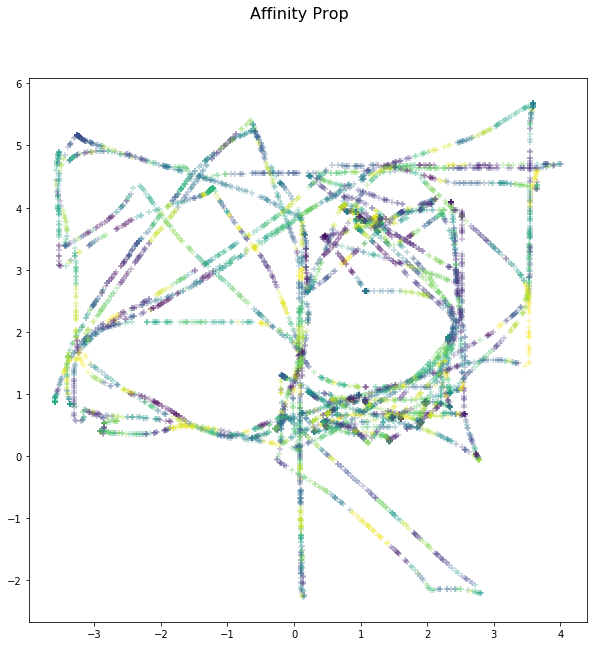

In [22]:
ccvk=np.load('ccvk.npy')
fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(111)
ax1.scatter(x= data.x, y=data.y,marker='+',c=data.Vk_aff,alpha=.313)
fig.suptitle('Affinity Prop', fontsize=16)




#cords3=path_to_xy(np.arange(0,len(cc)),cc)
#ax1.scatter(x= cords3.xcuant, y=cords3.ycuant ,marker='.',s=40,c='g')




In [23]:
data.Vk_aff.value_counts().index[1] 


287

In [24]:
#index_forlec=data.Vk_aff.value_counts().iloc[1]
lec_aff_leida= data.Vk_aff.value_counts().index[1]
lec=data[data.Vk_aff==lec_aff_leida].iloc[0,:-6].values

#lec_Kmn_leida= data.Vk.value_counts().index[1]

#lec=data.iloc[index_forlec,:-6].values
lec_Kmn_leida=np.power(lec.T-ccvk,2).sum(axis=1,keepdims=True).argmin()
lec_Kmn_leida,lec_aff_leida



(20, 287)

In [25]:
#lec=np.load('lec.npy')

start_ang=-240/2*np.pi/180
stop_ang= 240/2*np.pi/180
angs=np.linspace(start_ang,stop_ang,num=len(lec))


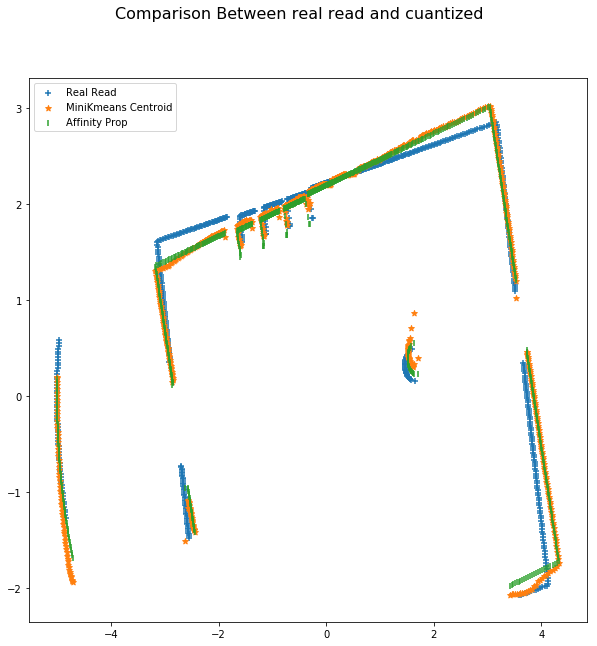

In [26]:
#ccvk=cc
cc=ccvk
cordsy, cordsx= np.cos(angs) *  lec ,  np.sin(angs) *  lec
CORDS=pd.DataFrame((cordsx,cordsy))
CORDS=CORDS.T
CORDS.columns=['x','y']
#print(np.power(lec.T-ccvk,2).sum(axis=1,keepdims=True).argmax())
#vec_obs=ccvk[np.power(lec.T-ccvk,2).sum(axis=1,keepdims=True).argmax()]
vec_obs_aff=ccvk_aff[lec_aff_leida]
vec_obs=cc[lec_Kmn_leida]

cordsy, cordsx= np.cos(angs) *  vec_obs ,  np.sin(angs) *  vec_obs_aff
CORDS['xx'],CORDS['yy']=cordsx,cordsy
cordsy, cordsx= np.cos(angs) *  vec_obs_aff ,  np.sin(angs) *  vec_obs_aff
CORDS['xxx'],CORDS['yyy']=cordsx,cordsy

fig = plt.figure(figsize=(10,10))
fig.suptitle('Comparison Between real read and cuantized', fontsize=16)

ax1 = fig.add_subplot(111)
ax1.scatter(x= CORDS.x, y=CORDS.y,marker='+' , label= 'Real Read')
ax1.scatter(x=CORDS.xx,y=CORDS.yy,marker='*', label= 'MiniKmeans Centroid')
ax1.scatter(x=CORDS.xxx,y=CORDS.yyy,marker='|', label= 'Affinity Prop')
ax1.legend()

In [27]:
lec_aff_leida= data.Vk_aff.value_counts().index[25]
print (lec_aff_leida)

140


In [28]:
#index_forlec=data.Vk_aff.value_counts().iloc[1]
lec=data[data.Vk_aff==lec_aff_leida].iloc[0,:-6].values

lec_Kmn_leida= np.power(lec.T-ccvk,2).sum(axis=1,keepdims=True).argmin()

#lec=data.iloc[index_forlec,:-6].values

#vec_obs=ccvk[np.power(lec.T-ccvk,2).sum(axis=1,keepdims=True).argmin()]

print(lec_aff_leida, lec_Kmn_leida)

(140, 58)


In [29]:
#lec=np.load('lec.npy')

start_ang=-240/2*np.pi/180
stop_ang= 240/2*np.pi/180
angs=np.linspace(start_ang,stop_ang,num=len(lec))


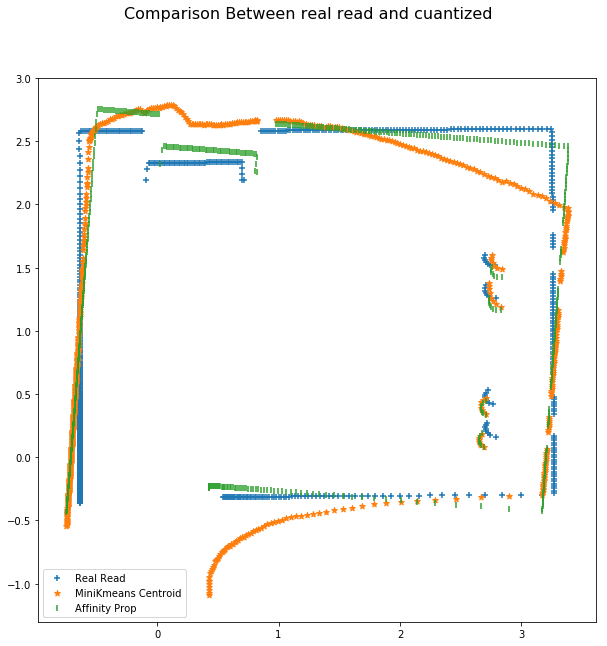

In [30]:
#ccvk=cc
cordsy, cordsx= np.cos(angs) *  lec ,  np.sin(angs) *  lec
CORDS=pd.DataFrame((cordsx,cordsy))
CORDS=CORDS.T
CORDS.columns=['x','y']
#print(np.power(lec.T-ccvk,2).sum(axis=1,keepdims=True).argmax())
#vec_obs=ccvk[np.power(lec.T-ccvk,2).sum(axis=1,keepdims=True).argmax()]
vec_obs_aff=ccvk_aff[lec_aff_leida]
vec_obs=cc[lec_Kmn_leida]

cordsy, cordsx= np.cos(angs) *  vec_obs ,  np.sin(angs) *  vec_obs_aff
CORDS['xx'],CORDS['yy']=cordsx,cordsy
cordsy, cordsx= np.cos(angs) *  vec_obs_aff ,  np.sin(angs) *  vec_obs_aff
CORDS['xxx'],CORDS['yyy']=cordsx,cordsy

fig = plt.figure(figsize=(10,10))
fig.suptitle('Comparison Between real read and cuantized', fontsize=16)

ax1 = fig.add_subplot(111)
ax1.scatter(x= CORDS.x, y=CORDS.y,marker='+' , label= 'Real Read')
ax1.scatter(x=CORDS.xx,y=CORDS.yy,marker='*', label= 'MiniKmeans Centroid')
ax1.scatter(x=CORDS.xxx,y=CORDS.yyy,marker='|', label= 'Affinity Prop')
ax1.legend()

In [31]:
from joblib import dump, load
dump(af, 'aff_prop_class.joblib',protocol=2) 

['aff_prop_class.joblib']

In [32]:
clf=load('aff_prop_class.joblib_2') ##PYTHON VERSION 2 

In [ ]:
lecs=data.iloc[:,:-6]
from sklearn.cluster import OPTICS
clust = OPTICS(min_samples=10)

In [ ]:
#####clust.fit(lecs)###NO PREDICT FUNC SO UNFEASIBLE$

In [ ]:
pd.Series(clust.labels_).describe()
data.Vk_aff=clust.labels_

In [ ]:
dump(clust, 'OPTICS_class.joblib',protocol=2) 

In [ ]:
#index_forlec=data.Vk_aff.value_counts().iloc[1]
lec_leida= data.Vk_aff.value_counts().index[1]
#lec=data.iloc[index_forlec,:-6].values
lec=data[data.Vk_aff==lec_leida].iloc[0,:-6].values
lec_leida

In [ ]:
#lec=np.load('lec.npy')

start_ang=-240/2*np.pi/180
stop_ang= 240/2*np.pi/180
angs=np.linspace(start_ang,stop_ang,num=len(lec))


In [ ]:
auxy , auxx =np.array([0,0]),np.array([0,0])
start_ang=-250/2*np.pi/180
stop_ang= 250/2*np.pi/180
angs=np.linspace(start_ang,stop_ang,num=len(vec_obs))


lecs=data[data.Vk_aff==lec_leida].sample(n=10,axis=0).iloc[:,:-6]

for  vec_obs in lecs.values.tolist():
    cordsy,cordsx= np.cos(angs) *  vec_obs ,  np.sin(angs) *  vec_obs
    auxy,auxx=np.concatenate((auxy,cordsy)),np.concatenate((auxx,cordsx))
print(lec_leida)    

In [ ]:

CORDS=pd.DataFrame((auxx,auxy))
CORDS=CORDS.T
CORDS.columns=[['x','y']]

vec_obs=ccvk_aff[lec_leida]
cordsy, cordsx= np.cos(angs) *  vec_obs ,  np.sin(angs) *  vec_obs

CORDSVK=pd.DataFrame()
CORDSVK['xx'],CORDSVK['yy']=cordsx,cordsy


fig = plt.figure(figsize=(10,10))
fig.suptitle('Comparison Between real 15 random reads and their cuantized versions OPTICS', fontsize=16)

ax1 = fig.add_subplot(111)
ax1.scatter(x= CORDS.x, y=CORDS.y,marker='+')
#ax1.scatter(x=CORDSVK.xx,y=CORDSVK.yy,marker='*')
print(lec_leida)

In [ ]:
lec_leida= data.Vk_aff.value_counts().index[3]

lec=data[data.Vk_aff==lec_leida].iloc[0,:-6].values

lec_leida

In [ ]:
ccvk=cc
cordsy, cordsx= np.cos(angs) *  lec ,  np.sin(angs) *  lec
CORDS=pd.DataFrame((cordsx,cordsy))
CORDS=CORDS.T
CORDS.columns=[['x','y']]
#print(np.power(lec.T-ccvk,2).sum(axis=1,keepdims=True).argmax())
vec_obs=ccvk[np.power(lec.T-ccvk,2).sum(axis=1,keepdims=True).argmax()]
vec_obs_aff=ccvk_aff[lec_leida]

cordsy, cordsx= np.cos(angs) *  vec_obs ,  np.sin(angs) *  vec_obs
CORDS['xx'],CORDS['yy']=cordsx,cordsy
cordsy, cordsx= np.cos(angs) *  vec_obs_aff ,  np.sin(angs) *  vec_obs_aff
CORDS['xxx'],CORDS['yyy']=cordsx,cordsy

fig = plt.figure(figsize=(10,10))
fig.suptitle('Comparison Between real read and cuantized', fontsize=16)

ax1 = fig.add_subplot(111)
ax1.scatter(x= CORDS.x, y=CORDS.y,marker='+' , label= 'Real Read')
#ax1.scatter(x=CORDS.xx,y=CORDS.yy,marker='*', label= 'MiniKmeans Centroid')
ax1.scatter(x=CORDS.xxx,y=CORDS.yyy,marker='|', label= 'OPTICS')
ax1.legend()

In [ ]:
auxy , auxx =np.array([0,0]),np.array([0,0])
start_ang=-250/2*np.pi/180
stop_ang= 250/2*np.pi/180
angs=np.linspace(start_ang,stop_ang,num=len(vec_obs))


lecs=data[data.Vk_aff==lec_leida].sample(n=10,axis=0).iloc[:,:-6]

for  vec_obs in lecs.values.tolist():
    cordsy,cordsx= np.cos(angs) *  vec_obs ,  np.sin(angs) *  vec_obs
    auxy,auxx=np.concatenate((auxy,cordsy)),np.concatenate((auxx,cordsx))
print(lec_leida)    

In [ ]:

CORDS=pd.DataFrame((auxx,auxy))
CORDS=CORDS.T
CORDS.columns=[['x','y']]

vec_obs=ccvk_aff[lec_leida]
cordsy, cordsx= np.cos(angs) *  vec_obs ,  np.sin(angs) *  vec_obs

CORDSVK=pd.DataFrame()
CORDSVK['xx'],CORDSVK['yy']=cordsx,cordsy


fig = plt.figure(figsize=(10,10))
fig.suptitle('Comparison Between real 15 random reads and their cuantized versions OPTICS', fontsize=16)

ax1 = fig.add_subplot(111)
ax1.scatter(x= CORDS.x, y=CORDS.y,marker='+')
ax1.scatter(x=CORDSVK.xx,y=CORDSVK.yy,marker='*')
print(lec_leida)

In [ ]:
dump(af, 'aff_prop_class.joblib',protocol=2) 

In [ ]:
lecs=data.iloc[:,:-6]
from sklearn.cluster import FeatureAgglomeration
agglo = FeatureAgglomeration(n_clusters=15)

In [ ]:
agglo.fit(lecs)

In [ ]:
lecs_reduced=agglo.fit_transform(lecs)

In [ ]:
lecs_reduced.shape

In [ ]:
from sklearn.decomposition import PCA, KernelPCA

In [ ]:
pca =PCA(n_components=15)
pca.fit(lecs)

In [ ]:
pca.transform(lecs).shape

In [ ]:
###TO DO GRID SEARCH PCA. FEATURE AGGL

In [ ]:
##LBG----- REading Doc's centroids
f=open('vq_images_sonar_32.dat')
contents=f.readlines()
cc_lgbt=[]
for char in contents:
    words=char.split()
    cc_lgbt.append(words[2:])
cc_buzo=[]
for i in range(32):
    cc_buzo.append(np.asarray(cc_lgbt[i]))
cc_buzo=np.asarray(cc_buzo)


In [ ]:
cc_buzo.shape

In [ ]:
len(cc_buzo)

In [ ]:
import joblib

In [ ]:
import sys


In [ ]:
sys.path.append('/usr/lib/python2.7/')